https://github.com/jagwithyou/linear-regression-example

In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
%matplotlib inline

In [2]:
# ** IMPORTING VALIDATION LIBRARY **
from validation.unit import data_assumptions, model_metrics

from validation.integration import (
   find_outliers, find_duplicates, find_balance, find_correlation
   ,validate_dataset, test_representative 
)
# **********************************

In [3]:
#Importing the dataset
data = pd.read_csv("test_repos/linear-regression-example/data/Advertising_data.csv")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


** NOTE that the author of this notebook preforms no validation checks on the data

In [26]:
data_assumptions(data)

There are no null values in the data.
There are no data type mismatches


,index,null_count,Data_Types
0,TV,0.0,0
1,radio,0.0,0
2,newspaper,0.0,0
3,sales,0.0,0


In [25]:
validate_dataset(data, categorical_threshold=0.15, corr_method="pearson"
                 , threshold = 0.75, data_type="df")

{'outliers': Empty DataFrame
 Columns: [Column, Value, Index, Issue]
 Index: [],
 'duplicates': Empty DataFrame
 Columns: [Column, Value, Index, Issue]
 Index: [],
 'correlation':    Attribute_1 Attribute_2  Absolute_Correlation
 3           TV       sales              0.782224
 12       sales          TV              0.782224}

    *****

# Simple Linear Regression

Here we will estimate the sales withh respect to the advertisement on Television. 

In [4]:
#Initializing the variables
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

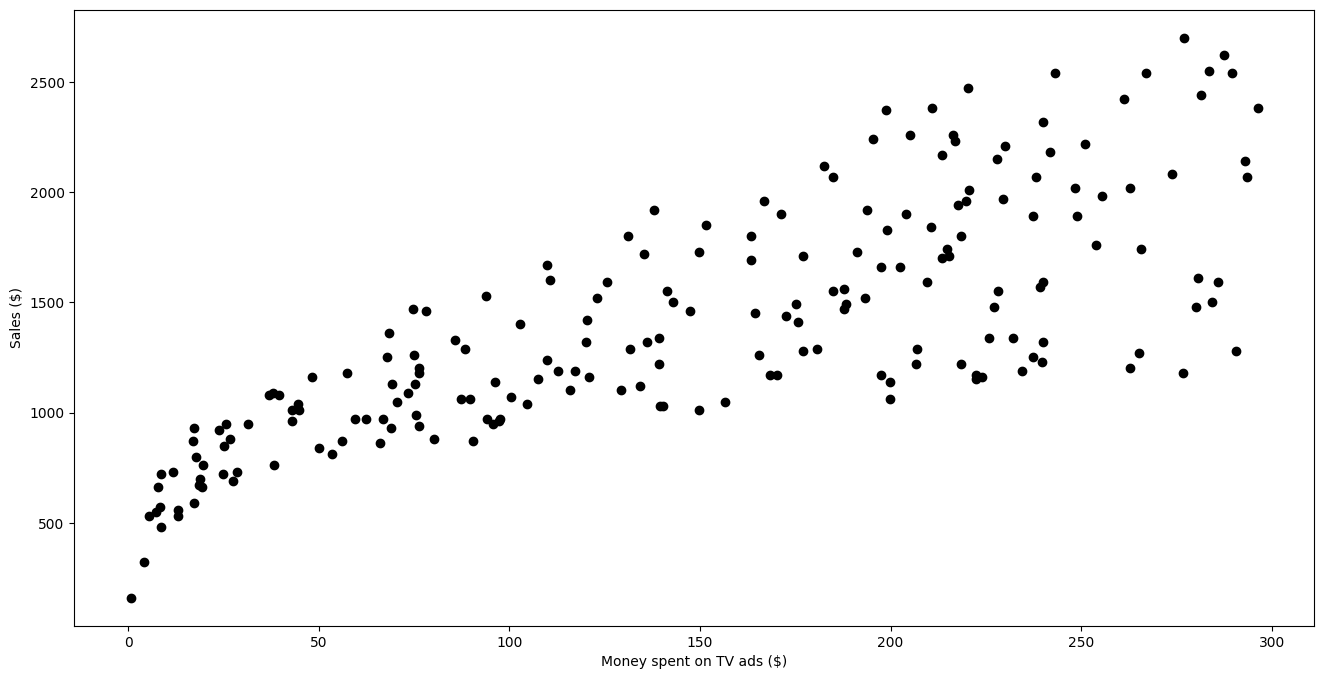

In [5]:
#Ploting a graph to see the points
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [6]:
#Splitting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

** NOTE that the author of this notebook does not validate the train and test set

In [30]:
test_representative(data.drop(columns="sales"), X_train)

,Feature,P_Value,Issue
0,TV,0.09444,Representative
0,radio,0.00000,Not Representative of Dataset
0,newspaper,0.00000,Not Representative of Dataset


In [32]:
test_representative(data.drop(columns="sales"), X_test)

,Feature,P_Value,Issue
0,TV,0.0,Not Representative of Dataset
0,radio,0.0,Not Representative of Dataset
0,newspaper,0.0,Not Representative of Dataset


    ***

In [7]:
#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

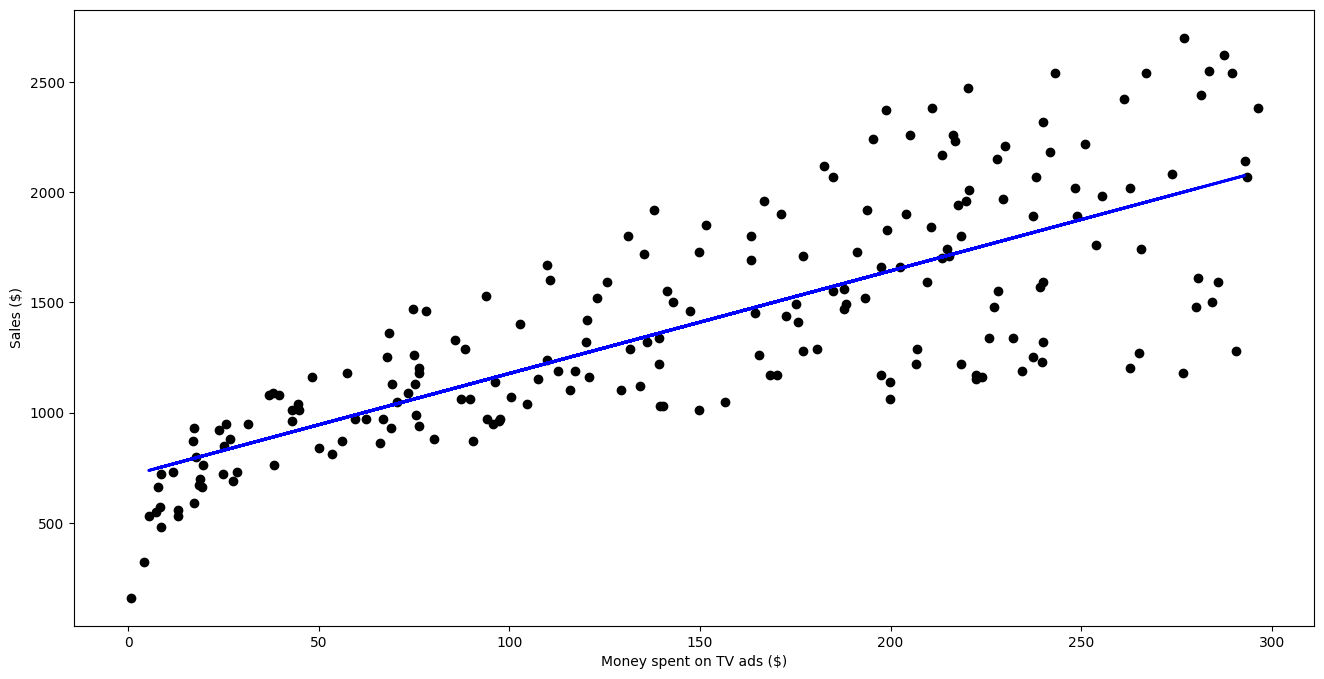

In [8]:
#predicting the Test set result
y_pred = reg.predict(X_test)
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.plot(
    X_test,
    y_pred,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [9]:
#Calculating the Coefficients
reg.coef_

array([[4.65297337]])

In [10]:
#Calculating the Intercept
reg.intercept_

array([711.96384306])

In [11]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6766954295627077

In [12]:
output = reg.predict([[230.1]])
output

array([[1782.61301562]])

** The unit testing for the model's accuracy could be improved

In [35]:
model_metrics(y_test, y_pred, threshold=[300,300,300,80], regression=True)

Testing for Regression Metrics


,Metric,Value,Threshold,Passed
0,Mean Squared Error,31740.973540,300,False
1,Root Mean Squared Error,178.159966,300,True
2,Mean Absolute Error,146.075672,300,True
3,Mean Absolute Percentage Error,15.198847,80,True


# Multiple Linear Regression

In [13]:
#Initializing the variables
X = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1,1)

In [14]:
#Splitting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train, y_train)

LinearRegression()

In [16]:
#predicting the Test set result
y_pred = multiple_reg.predict(X_test)

In [17]:
#Calculating the Coefficients
multiple_reg.coef_

array([[ 4.47295175, 18.91950542,  0.27611143]])

In [18]:
#Calculating the Intercept
multiple_reg.intercept_

array([297.90673381])

In [19]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.899438024100912

In [20]:
#Taking the input from the user
# print("Enter the ammount you will invest on:")
# tv = float(input("TV : "))
# radio = float(input("Radio : "))
# newspaper = float(input("Newspaper : "))

# #predicting the sales with respect to the inputs
# output = multiple_reg.predict([[tv,radio,newspaper]])
# print("you will get Rs{:.2f} sales by advertising Rs{} on TV, Rs{} on Radio and Rs{} on newspaper."\
#       .format(output[0][0] if output else "not predictable",tv,radio,newspaper))

In [21]:
#Saving the model
# if not os.path.exists('models'):
#     os.makedirs('models')
    
# MODEL_PATH = "models/multiple_reg.sav"
# pickle.dump(multiple_reg, open(MODEL_PATH, 'wb'))